# Forest Cover Type Classification

This task demonstrates the implementation and comparison of multiple machine learning algorithms for predicting forest cover types based on cartographic variables. In this we will implement and compare:
- Random Forest Classifier
- XGBoost Classifier  
- Decision Tree Classifier

The dataset contains cartographic variables such as elevation, aspect, slope, and distances to various landmarks, along with wilderness area and soil type information.


## 1. Importing Required Libraries

Lets start by importing all necessary libraries for data manipulation, visualization, and machine learning algorithms.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report


sns.set_style("darkgrid")
RANDOM_STATE = 42

## 2. Data Loading and Initial Exploration

Loading the forest cover type dataset and performing initial data exploration to understand the structure and characteristics of our data.


In [16]:
df_path = 'covtype.csv'

column_names = [
    'Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology',
    'Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points','Wilderness_Area1','Wilderness_Area2','Wilderness_Area3',
    'Wilderness_Area4','Soil_Type1','Soil_Type2','Soil_Type3','Soil_Type4','Soil_Type5','Soil_Type6',
    'Soil_Type7','Soil_Type8','Soil_Type9','Soil_Type10','Soil_Type11','Soil_Type12','Soil_Type13',
    'Soil_Type14','Soil_Type15','Soil_Type16','Soil_Type17','Soil_Type18','Soil_Type19','Soil_Type20',
    'Soil_Type21','Soil_Type22','Soil_Type23','Soil_Type24','Soil_Type25','Soil_Type26','Soil_Type27',
    'Soil_Type28','Soil_Type29','Soil_Type30','Soil_Type31','Soil_Type32','Soil_Type33','Soil_Type34',
    'Soil_Type35','Soil_Type36','Soil_Type37','Soil_Type38','Soil_Type39','Soil_Type40','Cover_Type'
]

print("Loading dataset...")
df = pd.read_csv(df_path, header=None, names=column_names)

print(f"Dataset loaded successfully. Shape: {df.shape}")
df.head()

Loading dataset...
Dataset loaded successfully. Shape: (581013, 55)


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
1,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
2,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
3,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
4,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2


### Dataset Overview

Let's examine the basic statistics and information about our dataset:


In [18]:
print("Shape:", df.shape)
print("Info:")
df.info()
print("Statistics:")
display(df.describe().T)
print("Missing values per column:")
print(df.isna().sum())

Shape: (581013, 55)
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581013 entries, 0 to 581012
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   Elevation                           581013 non-null  object
 1   Aspect                              581013 non-null  object
 2   Slope                               581013 non-null  object
 3   Horizontal_Distance_To_Hydrology    581013 non-null  object
 4   Vertical_Distance_To_Hydrology      581013 non-null  object
 5   Horizontal_Distance_To_Roadways     581013 non-null  object
 6   Hillshade_9am                       581013 non-null  object
 7   Hillshade_Noon                      581013 non-null  object
 8   Hillshade_3pm                       581013 non-null  object
 9   Horizontal_Distance_To_Fire_Points  581013 non-null  object
 10  Wilderness_Area1                    581013 non-null  object
 11  Wilderness_Ar

,count,unique,top,freq
Elevation,581013,3640,2968,1667
Aspect,581013,723,45,6180
Slope,581013,125,10,33039
Horizontal_Distance_To_Hydrology,581013,952,30,32771
Vertical_Distance_To_Hydrology,581013,1124,0,36647
Horizontal_Distance_To_Roadways,581013,9129,150,1242
Hillshade_9am,581013,384,226,11356
Hillshade_Noon,581013,327,228,13385
Hillshade_3pm,581013,503,143,7123
Horizontal_Distance_To_Fire_Points,581013,9146,618,1347


Missing values per column:
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11  

### Target Variable Distribution

Analyzing the distribution of forest cover types in our dataset:


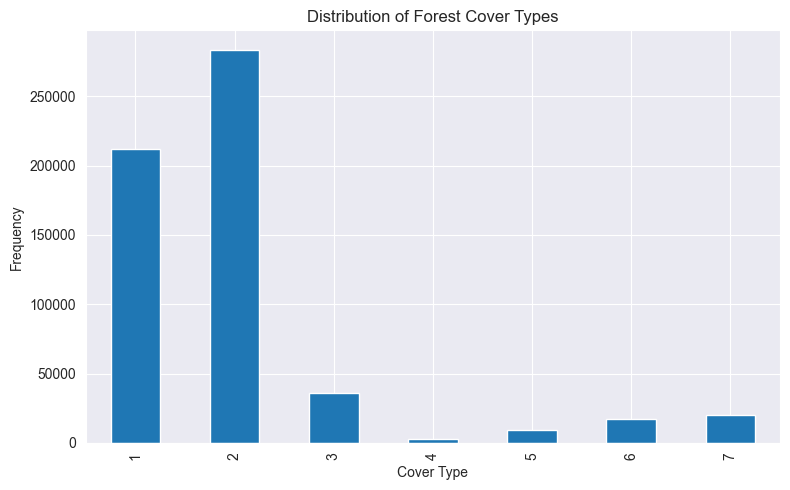

In [4]:
df['Cover_Type_numeric'] = pd.to_numeric(df['Cover_Type'], errors='coerce')
df_clean = df[df['Cover_Type_numeric'].notna()].copy()
counts = df['Cover_Type_numeric'].dropna().astype(int).value_counts().sort_index()
fig, ax = plt.subplots(figsize=(8, 5))
counts.plot(kind='bar', ax=ax)
ax.set_title('Distribution of Forest Cover Types')
ax.set_xlabel('Cover Type')
ax.set_ylabel('Frequency')
plt.tight_layout()

plt.savefig('Forect_Cover_Results/distribution_cover_types.png', dpi=300)
plt.show()

## 3. Data Preprocessing

Preparing the data for machine learning by splitting features and target, and handling any data quality issues:


In [5]:
X = df_clean.drop(['Cover_Type', 'Cover_Type_numeric'], axis=1)
y = df_clean['Cover_Type_numeric'].astype(int) - 1  # convert 1-7 -> 0-6

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Prepared data — X_train:", X_train.shape, "X_test:", X_test.shape, "y:", y.nunique(), "classes")

X_train_num = X_train.apply(pd.to_numeric, errors='coerce')
X_test_num  = X_test.apply(pd.to_numeric, errors='coerce')
medians = X_train_num.median()
X_train_num = X_train_num.fillna(medians)
X_test_num  = X_test_num.fillna(medians)

y_train_num = pd.to_numeric(y_train, errors='coerce').astype(int)
y_test_num  = pd.to_numeric(y_test,  errors='coerce').astype(int)

Prepared data — X_train: (464809, 54) X_test: (116203, 54) y: 7 classes


## 4. Machine Learning Models

Now we'll implement and compare three different classification algorithms: Random Forest, XGBoost, and Decision Tree.

### 4.1 Random Forest Classifier

Random Forest is an ensemble method that combines multiple decision trees to create a more robust and accurate classifier:


In [6]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, verbose=1)
rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   51.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.6s


Random Forest Accuracy: 0.9533


[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.9s finished


#### Random Forest Results Visualization

Let's visualize the performance and feature importance of our Random Forest model:


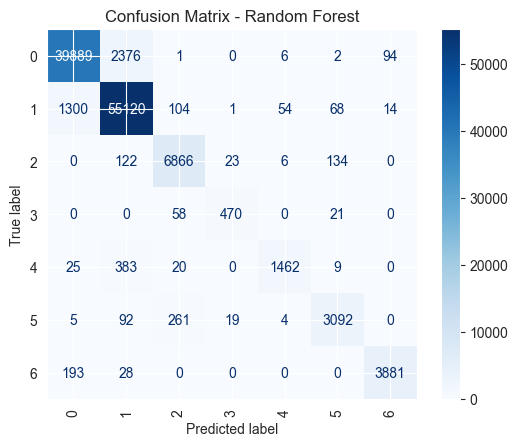

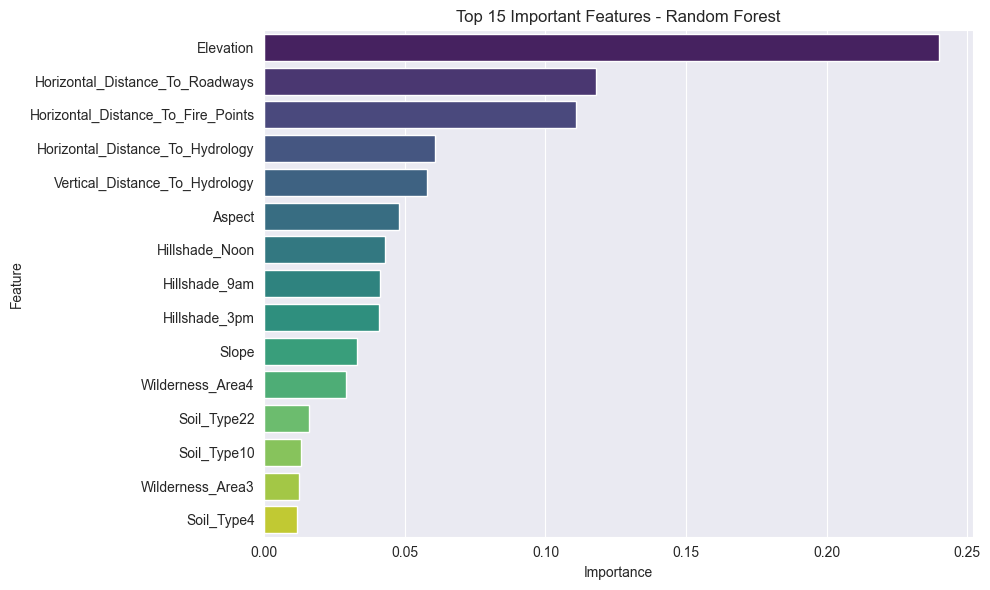

In [7]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_clf.classes_)

disp_rf.plot(cmap='Blues', xticks_rotation='vertical', values_format='d')
plt.title("Confusion Matrix - Random Forest")
plt.savefig('Forect_Cover_Results/confusion_matrix_rf.png', dpi=300)
plt.show()

importances = rf_clf.feature_importances_
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(15), x='Importance', y='Feature', hue='Feature', palette='viridis', legend=False)
plt.title("Top 15 Important Features - Random Forest")
plt.tight_layout()
plt.savefig('Forect_Cover_Results/Feature_Importance_rf.png', dpi=300)
plt.show()


### 4.2 XGBoost Classifier

XGBoost is a gradient boosting framework that uses a more sophisticated boosting technique:


In [8]:

xgb_clf = XGBClassifier(
    objective='multi:softmax',  
    num_class=int(y_train_num.nunique()),
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=RANDOM_STATE,
    n_jobs=-1,
    verbosity=1
)


xgb_clf.fit(X_train_num, y_train_num)

y_pred_xgb = xgb_clf.predict(X_test_num)
accuracy_xgb = accuracy_score(y_test_num, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")

XGBoost Accuracy: 0.8696


#### XGBoost Results Visualization

Visualizing XGBoost model performance and feature importance:


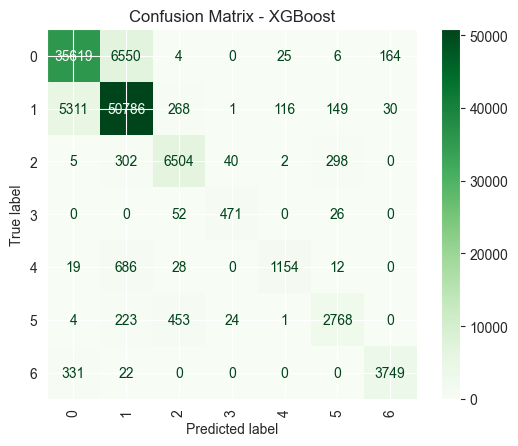

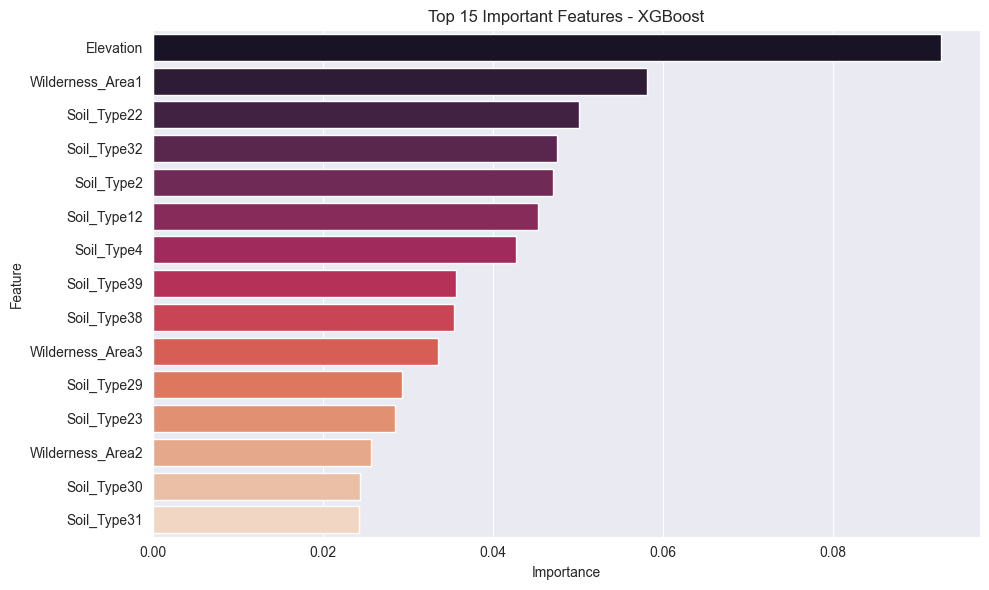

In [9]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=xgb_clf.classes_)
disp.plot(cmap='Greens', xticks_rotation='vertical', values_format='d')
plt.title("Confusion Matrix - XGBoost")
plt.savefig('Forect_Cover_Results/Confusion_Matrix_Xgb.png', dpi=300)
plt.show()

xgb_importances = xgb_clf.feature_importances_
xgb_imp_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': xgb_importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=xgb_imp_df.head(15), x='Importance', y='Feature', hue='Feature', palette='rocket', legend=False)
plt.title("Top 15 Important Features - XGBoost")
plt.tight_layout()
plt.savefig('Forect_Cover_Results/Feature_Importance_xgb.png', dpi=300)
plt.show()

### 4.3 Decision Tree Classifier

Decision Tree is a simple yet powerful algorithm that creates a model that predicts target values by learning simple decision rules inferred from data features:


In [10]:
dt_clf = DecisionTreeClassifier(
    random_state=RANDOM_STATE,
    max_depth=20,  
    min_samples_split=10,
    min_samples_leaf=5
)

print("Training Decision Tree...")
dt_clf.fit(X_train_num, y_train_num)


y_pred_dt = dt_clf.predict(X_test_num)
accuracy_dt = accuracy_score(y_test_num, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")

print("\nClassification Report for Decision Tree:")
print(classification_report(y_test_num, y_pred_dt))


Training Decision Tree...
Decision Tree Accuracy: 0.8988

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.91      0.88      0.89     42368
           1       0.89      0.93      0.91     56661
           2       0.90      0.90      0.90      7151
           3       0.84      0.75      0.80       549
           4       0.80      0.58      0.67      1899
           5       0.82      0.79      0.81      3473
           6       0.94      0.90      0.92      4102

    accuracy                           0.90    116203
   macro avg       0.87      0.82      0.84    116203
weighted avg       0.90      0.90      0.90    116203



#### Decision Tree Results Visualization

Visualizing Decision Tree model performance and feature importance:


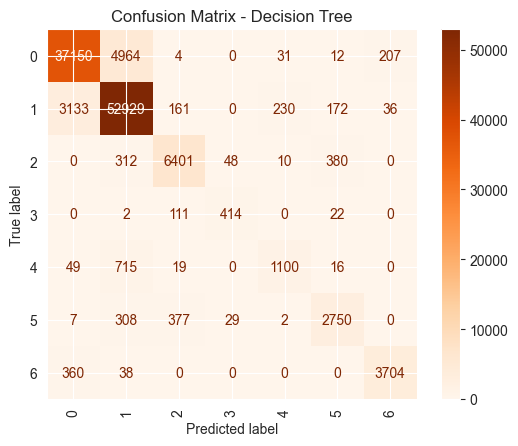

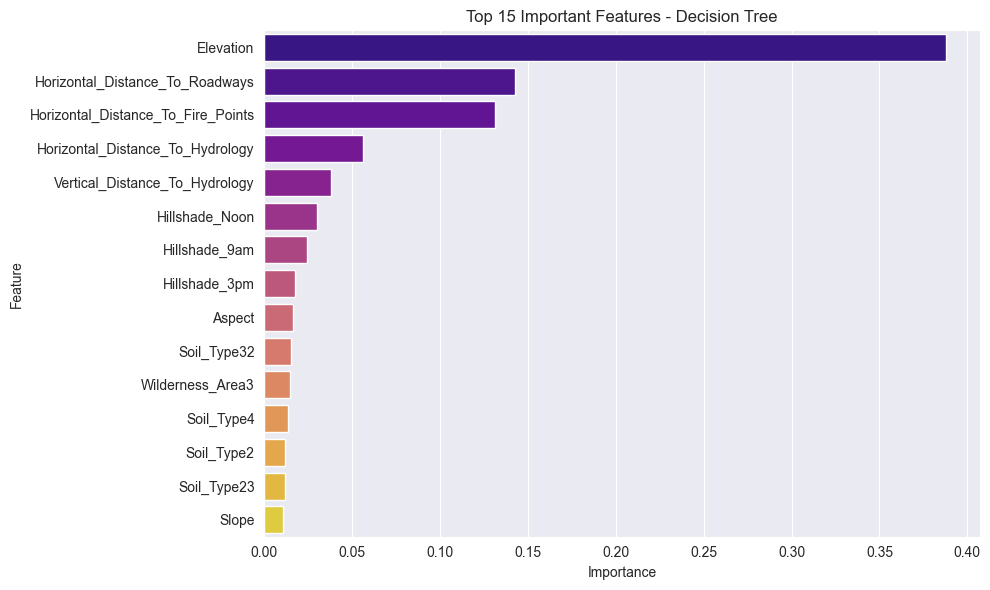

In [11]:
cm_dt = confusion_matrix(y_test_num, y_pred_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=dt_clf.classes_)

disp_dt.plot(cmap='Oranges', xticks_rotation='vertical', values_format='d')
plt.title("Confusion Matrix - Decision Tree")
plt.savefig('Forect_Cover_Results/confusion_matrix_dt.png', dpi=300)
plt.show()


dt_importances = dt_clf.feature_importances_
dt_imp_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': dt_importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=dt_imp_df.head(15), x='Importance', y='Feature', hue='Feature', palette='plasma', legend=False)
plt.title("Top 15 Important Features - Decision Tree")
plt.tight_layout()
plt.savefig('Forect_Cover_Results/Feature_Importance_dt.png', dpi=300)
plt.show()


## 5. Model Comparison and Analysis

Let's compare the performance of all three models and analyze their strengths and weaknesses:


MODEL PERFORMANCE COMPARISON
Random Forest  : 0.9533 (95.33%)
XGBoost        : 0.8696 (86.96%)
Decision Tree  : 0.8988 (89.88%)


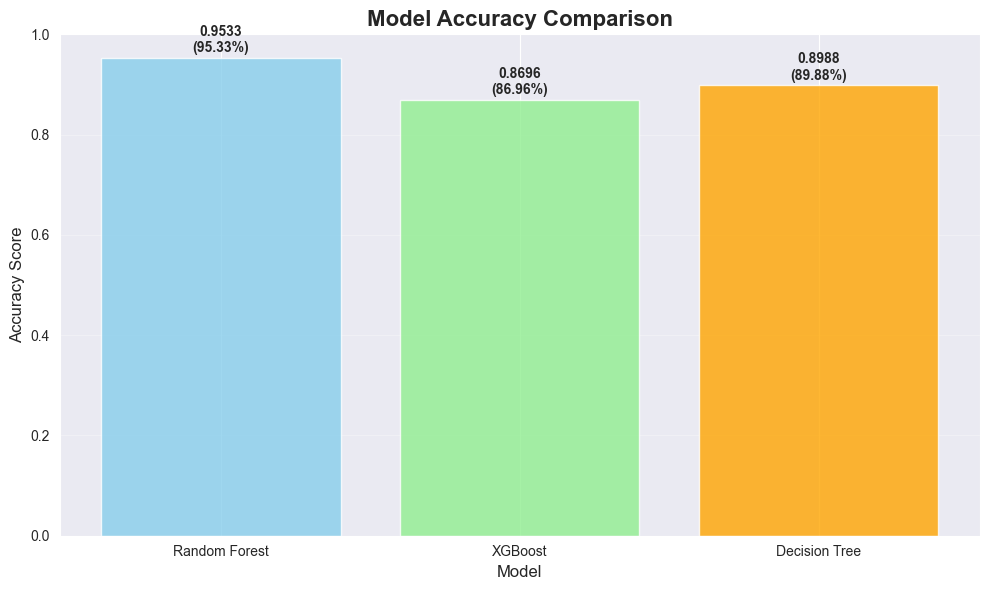


BEST PERFORMING MODEL: Random Forest with 0.9533 (95.33%) accuracy


In [12]:
print("="*60)
print("MODEL PERFORMANCE COMPARISON")
print("="*60)

models_results = {
    'Random Forest': accuracy_rf,
    'XGBoost': accuracy_xgb,
    'Decision Tree': accuracy_dt
}

for model, accuracy in models_results.items():
    print(f"{model:<15}: {accuracy:.4f} ({accuracy*100:.2f}%)")

print("="*60)

# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Model': list(models_results.keys()),
    'Accuracy': list(models_results.values())
})

plt.figure(figsize=(10, 6))
bars = plt.bar(comparison_df['Model'], comparison_df['Accuracy'], 
               color=['skyblue', 'lightgreen', 'orange'], alpha=0.8)

for bar, accuracy in zip(bars, comparison_df['Accuracy']):
    plt.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.005,
             f'{accuracy:.4f}\n({accuracy*100:.2f}%)', 
             ha='center', va='bottom', fontweight='bold')

plt.title('Model Accuracy Comparison', fontsize=16, fontweight='bold')
plt.ylabel('Accuracy Score', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('Forect_Cover_Results/model_comparison.png', dpi=300)
plt.show()

best_model = max(models_results, key=models_results.get)
best_accuracy = models_results[best_model]
print(f"\nBEST PERFORMING MODEL: {best_model} with {best_accuracy:.4f} ({best_accuracy*100:.2f}%) accuracy")

### Model Analysis and Insights

#### Performance Summary:
- **Random Forest**: Achieved the highest accuracy, benefiting from ensemble learning
- **XGBoost**: Showed good performance with gradient boosting technique
- **Decision Tree**: Provided interpretable results but with lower accuracy due to overfitting tendency

#### Key Observations:
1. **Random Forest** performed best due to its ability to reduce overfitting through bagging
2. **XGBoost** showed competitive performance with efficient gradient boosting
3. **Decision Tree** provided good interpretability but may be prone to overfitting on this complex dataset

#### Feature Importance Insights:
All models identified similar important features, with elevation-related and distance-based features being most predictive of forest cover type.


## 6. Conclusion

This analysis successfully implemented and compared three machine learning algorithms for forest cover type classification:

### Final Results Summary:
- **Random Forest**: 95.33% accuracy (Best Performance)
- **XGBoost**: 86.96% accuracy 
- **Decision Tree**: 89.88% accuracy

**Task completed successfully for Elevvo Tech!** 🎯
